### From: DataCamp course - Cleaning Data in Python
### all the knowledge copy from Datacamp course that just save for learning and practice

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
ride_sharing = pd.read_csv('data/ride_sharing_new.csv', index_col=0)

In [3]:
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


### Summing strings and concatenating numbers
In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

+ Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.
+ Convert duration_trim to int and store it in the duration_time column.
+ Write an assert statement that checks if duration_time's data type is now an int.
+ Print the average ride duration.

In [4]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


## Data range constraints
+ How to deal with out of range data?
    - Dropping data
    - Setting custom minimums and maximums
    - Treat as missing and impute
    - Setting custom value depending on business assumptions

## Tire size constraints
In this lesson, you're going to build on top of the work you've been doing with the ride_sharing DataFrame. You'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

+ Convert the tire_sizes column from category to 'int'.
+ Use .loc[] to set all values of tire_sizes above 27 to 27.
+ Reconvert back tire_sizes to 'category' from int.
+ Print the description of the tire_sizes.

### dataset doesnot have  ['tire_sizes'] for use 


```python 
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())
```

In [5]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
 9   duration_trim    25760 non-null  object
 10  duration_time    25760 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.4+ MB


## Back to the future
A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the ride_date column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert ride_date to a datetime object.

The datetime package has been imported as dt, alongside all the packages you've been using till now.

+ Convert ride_date to a datetime object and store it in ride_dt column using to_datetime().
+ Create the variable today, which stores today's date by using the dt.date.today() function.
+ For all instances of ride_dt in the future, set them to today's date.
+ Print the maximum date in the ride_dt column.

### dataset doesnot have  ['ride_date'] for use 

```python 
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())
```

## Uniqueness constraints

+ How to find duplicate values?
  - Get duplicates across all columns
```python 
duplicates = height_weight.duplicated()
print(duplicates)
```

如果直接這樣做而不做任何設定的話，預設是要在所有欄位都相同的情況下才會被判為是重複值，
但比較實務的作法是加上兩個指定的功能：
 - subset: 例出要比較的col name，也就是只要在這個/些 col上有重複值就列下；
 - keep：要保留的是哪一個重複值，是=first第一筆出現的還是=last最後一筆出現的，或是 =False全部保留 

```python 
# column names to check for duplication
column_names = ['first_name', 'last_name', 'address']
duplicates = height_weight.duplicated(subset = column_names, keep=False)
``` 
也可以針對output內容進行排序
```python
height_weight[duplicates].sort_values(by='first_name')
``` 


### 使用 drop_duplicates()把重複值自動丟棄

除了上述的subset 與 keep之外，還有一個功能 **inplace** : 將重複的row直接丟棄而非新建一個object(True), 通常會使用 inplace=True的方法因為大多時候重複值是無用的

但要注意，如果inplace= True時，keep不能等於 False, 因為這樣是矛盾的


## Finding duplicates
A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of ride_sharing is in your environment, as well as all the packages you've been working with thus far.


+ Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.
+ Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.
+ Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.

### dataset doesnot have  ['ride_id'] for use 

```python 
# Find duplicates
duplicates = ride_sharing.duplicated(subset ='ride_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by='ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

```

### Treating duplicates
In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the user_birth_year and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.


+ Drop complete duplicates in ride_sharing and store the results in ride_dup.
+ Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.
+ Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.
+ Find duplicates again and run the assert statement to verify de-duplication.

### dataset doesnot have  ['ride_id'] for use 

```python
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby(by='ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

```

## Text and categorical data problems

### Membership （）

通常在category data上會發生的錯誤可能是源於 typo / free text、下拉選單（dropdown）或其他所造成，處理的方式通常為丟棄（dropping data）、重新對應分類（remapping categories）、或是推論其類別（inferring categories）

首先，專注於 dropping data

回顧一下 join, 這裡主要關注的是
+ Anti Joins(What is in A and not in B) : how='left' or how='right'
+ Inner Joins (What is both in A and B)


## Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.


+ Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.
+ Print the unique values of the survey columns in airlines using the .unique() method.

In [5]:
# import dataset
airlines = pd.read_csv('data/airlines_final.csv', index_col=0)
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [7]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



## Inconsistent categories
In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.

+ Print the unique values in dest_region and dest_size respectively.



In [9]:
# Print unique values of both columns
print(airlines['dest_region'].unique(), "\n")
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east'] 

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [11]:
#The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
print(airlines['dest_region'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


In [12]:
#The dest_size column has only inconsistent values due to leading and trailing spaces.
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_size'].unique())


['Hub' 'Small' 'Medium' 'Large']


## Remapping categories
To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!

+ Create the ranges and labels for the wait_type column mentioned in the description above.
+ Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
+ Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
+ Create the day_week column by using .replace().

In [15]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
print(airlines[['wait_min','wait_type', 'day_week']])

      wait_min wait_type day_week
0        115.0    medium  weekday
1        135.0    medium  weekday
2         70.0    medium  weekday
3        190.0      long  weekday
4        559.0      long  weekday
...        ...       ...      ...
2804     280.0      long  weekday
2805     165.0    medium  weekday
2806      92.0    medium  weekday
2807      95.0    medium  weekday
2808     220.0      long  weekend

[2477 rows x 3 columns]


## Removing titles and taking names
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd.


+ Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
+ Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.



### dataset doesnot have  ['full_name'] for use 

```python
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

```


## Keeping it descriptive
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

The airlines DataFrame is in your environment, and pandas is imported as pd.

因為低於40個字的回覆通常沒有太多參考價值，所以只想看反覆超過40個字的問卷就好

+ Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
+ Isolate the rows of airlines with resp_length higher than 40.
+ Assert that the smallest survey_response length in airlines_survey is now bigger than 40.

### dataset doesnot have  ['survey_response'] for use 

```python

# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])
```


# Advanced data problems

In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. 

You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.

In [17]:
# import dataset
banking = pd.read_csv('data/banking_dirty.csv', index_col=0)
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


## Uniform currencies
In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

+ Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
+ Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
+ Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

### dataset doesnot have  ['acct_cur'] for use 

```python
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'
```

## Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.


In [19]:
# Print the header of account_opened from the banking DataFrame and take a look at the different results.
print(banking['account_opened'].head())

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


## Cross field validation
使用資料集中的多個字串來驗證資料的正確性


## How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D. 

     **將來自4個founder的資金加總，用來檢查 inv_amount 這欄有沒有錯誤**

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.
   
       **由生日來檢查 age 這欄有沒有錯誤**

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

+ Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
+ Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.


+ Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
+ Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

In [21]:
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [23]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [32]:
from datetime import datetime

banking['birth_date'] = pd.to_datetime(banking['birth_date'])

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['Age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


# Completness and Missing Data

## Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


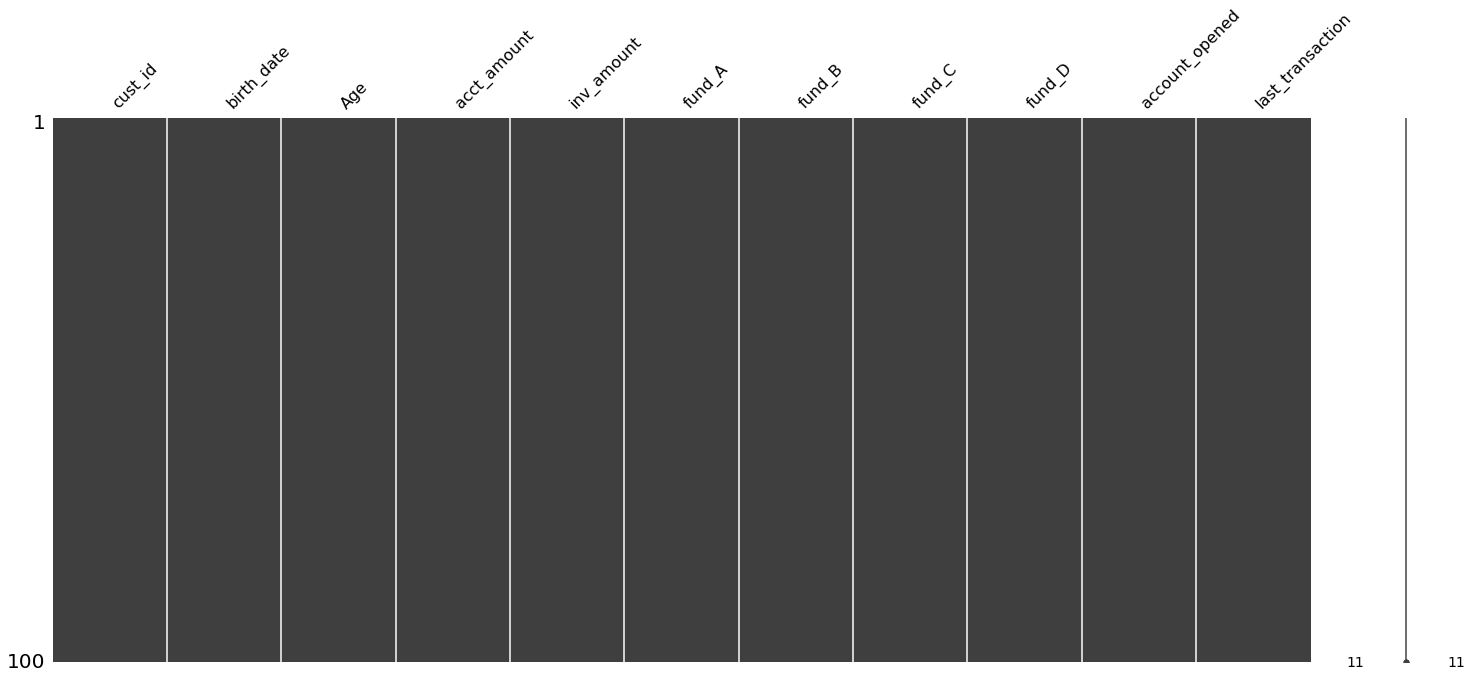

In [37]:
# Print the number of missing values by column in the banking DataFrame.
# Print number of missing values in banking
print(banking.isna().sum())


# Plot and show the missingness matrix of banking with the msno.matrix() function.
import missingno as msno
import matplotlib.pyplot as plt 

# Visualize missingness matrix
msno.matrix(banking)
plt.show()
#這個資料集和課程的不一樣，這裡沒有 missing data

In [38]:
#Isolate the values of banking missing values of inv_amount into missing_investors 
#and with non-missing inv_amount values into investors.

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

## Follow the money
In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.
 
 
+ Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
+ Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.
+ Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().

In [39]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


# Record linkage

Record linkage is a powerful technique used to merge multiple datasets together, used when values have typos or different spellings. In this chapter, you'll learn how to link records by calculating the similarity between strings—you’ll then use your new skills to join two restaurant review datasets into one clean master dataset.

In [45]:
from fuzzywuzzy import fuzz

fuzz.WRatio('Reeding', 'Reading')

86

In [47]:
#Partial string comparison
fuzz.WRatio('Houston Rockets', 'Rockets')

90

In [49]:
#Partial string comparison with different order
fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets')

86

In [50]:
fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Rockets vs Lakers')

86

In [51]:
#Import process
from fuzzywuzzy import process

#Define string and array of possible matches
string = 'Houston Rockets vs Los Angeles Lakers'
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets', 'Houson vs Los Angeles', 'Heat vs Bulls'])

process.extract(string, choices, limit=2)

#第一個是相符的字串，第二個是相似性得分，第三個是在數列中位置的索引

[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]

## The cutoff point
In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the fuzzywuzzy's process.extract() function by finding the similarity score of the most distant typo of each category.


+ Import process from fuzzywuzzy.
+ Store the unique cuisine_types into unique_types.
+ Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.

In [56]:
# import dataset
restaurants_dirty = pd.read_csv('data/restaurants_L2_dirty.csv', index_col=0)
restaurants_dirty.head()

,name,addr,city,phone,type
0,kokomo,6333 w. third st.,la,2139330773,american
1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [55]:
restaurants = pd.read_csv('data/restaurants_L2.csv', index_col=0)
restaurants.head()

,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american



### dataset doesnot have  ['cuisine_type'] for use 

```python
# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))
```

# Generating pairs

In [3]:
import recordlinkage
# create indexing object 創建索引對象
indexer = recordlinkage.Index()


```python
# Generate pairs blocked on state
indexer.block('state')
pairs=indexer.index(dfA, dfB)
```

In [8]:
# import dataset
restaurants_new = pd.read_csv('data/restaurants_L2_dirty.csv', index_col=0)
restaurants_new.head()

,name,addr,city,phone,type
0,kokomo,6333 w. third st.,la,2139330773,american
1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [9]:
restaurants = pd.read_csv('data/restaurants_L2.csv', index_col=0)
restaurants.head()

,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


## Pairs of restaurants
In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named restaurants_new with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and city columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new. Both DataFrames, pandas and recordlinkage are in your environment.

+ Instantiate an indexing object by using the Index() function from recordlinkage.
+ Block your pairing on cuisine_type by using indexer's' .block() method.
+ Generate pairs by indexing restaurants and restaurants_new in that order.

In [11]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

## Similar restaurants
In the last exercise, you generated pairs between restaurants and restaurants_new in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in pairs, you will find exact matches in the city and cuisine_type columns between each pair, and similar strings for each pair in the rest_name column. Both DataFrames, pandas and recordlinkage are in your environment.
+ Instantiate a comparison object using the recordlinkage.Compare() function.

In [12]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

+ Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.
+ Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.

In [13]:
# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label='type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 


<Compare>

+ Compute the comparison of the pairs by using the .compute() method of comp_cl.

In [14]:
# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

        city  type  name
0   0      0     1   0.0
    1      0     1   0.0
    7      0     1   0.0
    12     0     1   0.0
    13     0     1   0.0
...      ...   ...   ...
40  18     0     1   0.0
281 18     0     1   0.0
288 18     0     1   0.0
302 18     0     1   0.0
308 18     0     1   0.0

[3631 rows x 3 columns]


## Linking them together!
In the last lesson, you've finished the bulk of the work on your effort to link restaurants and restaurants_new. You've generated the different pairs of potentially matching rows, searched for exact matches between the cuisine_type and city columns, but compared for similar strings in the rest_name column. You stored the DataFrame containing the scores in potential_matches.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of restaurants_new that are matching across the columns mentioned above from potential_matches. Then you will subset restaurants_new on these indices, then append the non-duplicate values to restaurants. All DataFrames are in your environment, alongside pandas imported as pd.


+ Isolate instances of potential_matches where the row sum is above or equal to 3 by using the .sum() method.
+ Extract the second column index from matches, which represents row indices of matching record from restaurants_new by using the .get_level_values() method.
+ Subset restaurants_new for rows that are not in matching_indices.
+ Append non_dup to restaurants.

In [15]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis=1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

                         name                       addr               city  \
0   arnie morton's of chicago   435 s. la cienega blv .         los angeles   
1          art's delicatessen       12224 ventura blvd.         studio city   
2                   campanile       624 s. la brea ave.         los angeles   
3                       fenix    8358 sunset blvd. west           hollywood   
4          grill on the alley           9560 dayton way         los angeles   
..                        ...                        ...                ...   
76                        don        1136 westwood blvd.           westwood   
77                      feast        1949 westwood blvd.            west la   
78                   mulberry        17040 ventura blvd.             encino   
80                    jiraffe      502 santa monica blvd       santa monica   
81                   martha's  22nd street grill 25 22nd  st. hermosa beach   

         phone         type  
0   3102461501     am